# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [1]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

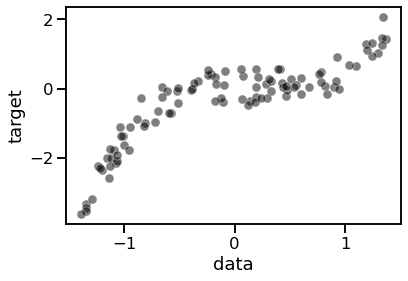

In [2]:
import pandas as pd
import seaborn as sns

full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent to be the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model. Compute the mean squared error as
well.

In [3]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

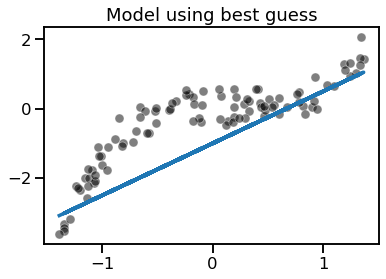

In [19]:
# Write your code here.: plot both the data and the model predictions

weight = 1.5
intercept = -1


f_data = f(data, weight, intercept)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data, y=target, color="black", alpha=0.5)
plt.plot(data, f_data)
_ = plt.title("Model using best guess")


In [20]:
# Write your code here.: compute the mean squared error
from sklearn.metrics import mean_squared_error
model_error = mean_squared_error(target, f_data)
print(f"The mean squared error of the guessed model is {model_error:.2f}")

The mean squared error of the guessed model is 0.95


Train a linear regression model and plot both the data and the predictions
of the model. Compute the mean squared error with this model.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [21]:
from sklearn.linear_model import LinearRegression

# Write your code here.: fit a linear regression
linear_regression = LinearRegression()
linear_regression.fit(data.reshape(-1, 1), target)

f_data = linear_regression.predict(data.reshape(-1, 1))


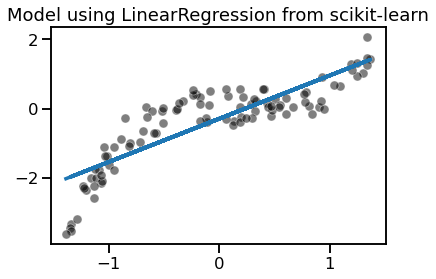

In [22]:
# Write your code here.: plot the data and the prediction of the linear
# regression model
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data, y=target, color="black", alpha=0.5)
plt.plot(data, f_data)
_ = plt.title("Model using LinearRegression from scikit-learn")


In [15]:
# Write your code here.: compute the mean squared error
from sklearn.metrics import mean_squared_error
inferred_target = linear_regression.predict(data.reshape(-1, 1))
model_error = mean_squared_error(target, inferred_target)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 0.37
